In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

url = "https://en.wikipedia.org/wiki/List_of_solar_eclipses_in_the_21st_century"

response = requests.get(url)
html_content = response.text

# Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(html_content, "html.parser")

table = soup.find("table", {"class": "wikitable"})

data = []
rows = table.find_all("tr")[1:]
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 6: 
        eclipse_date = row.find("th").text.strip()
        eclipse_date = re.sub(r'\[\d+\]', '', eclipse_date)  # Remove citation numbers
        eclipse_date = pd.to_datetime(eclipse_date, format='%B %d, %Y').strftime("%Y-%m-%d")
        
        eclipse_magnitude_text = cols[4].text.strip()
        eclipse_magnitude_match = re.search(r'[\d\.]+', eclipse_magnitude_text)
        eclipse_magnitude = float(eclipse_magnitude_match.group()) if eclipse_magnitude_match else float('nan')
        
        data.append((eclipse_date, eclipse_magnitude))

df = pd.DataFrame(data, columns=["Date", "Magnitude"])

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

df["Month"] = df["Date"].dt.month_name()
monthly_mean_magnitude = df.groupby("Month")["Magnitude"].mean()

df


,Date,Magnitude,Month
0,2001-06-21,4.0,June
1,2001-12-14,3.0,December
2,2002-06-10,0.0,June
3,2002-12-04,2.0,December
4,2003-05-31,3.0,May
...,...,...,...
219,2098-10-24,NaN,October
220,2099-03-21,7.0,March
221,2099-09-14,5.0,September
222,2100-03-10,7.0,March


In [27]:
df["Month"] = df["Date"].dt.month_name()
monthly_mean_magnitude = df.groupby("Month")["Magnitude"].mean()

months = list(monthly_mean_magnitude.index)
magnitude = list(monthly_mean_magnitude.values)

months

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

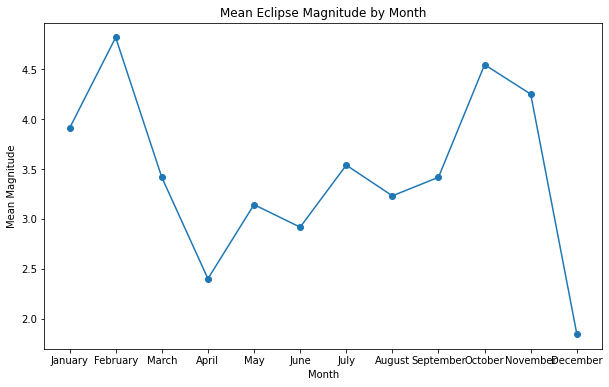

In [32]:
import calendar

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_magnitude.index.to_numpy(), monthly_mean_magnitude.to_numpy(), marker='o')
plt.title("Mean Eclipse Magnitude by Month")
plt.xlabel("Month")
plt.ylabel("Mean Magnitude")
plt.xticks(np.arange(1, 13), calendar.month_name[1:])

plt.show()

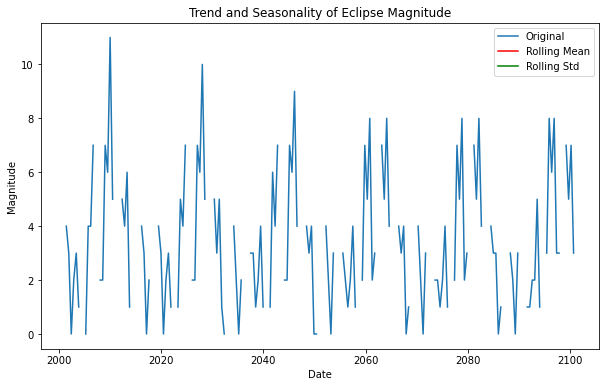

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

rolling_window = 12 
rolling_mean = df.set_index('Date')['Magnitude'].rolling(window=rolling_window).mean()
rolling_std = df.set_index('Date')['Magnitude'].rolling(window=rolling_window).std()

plt.figure(figsize=(10, 6))
plt.plot(df.set_index('Date')['Magnitude'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')

plt.title('Trend and Seasonality of Eclipse Magnitude')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

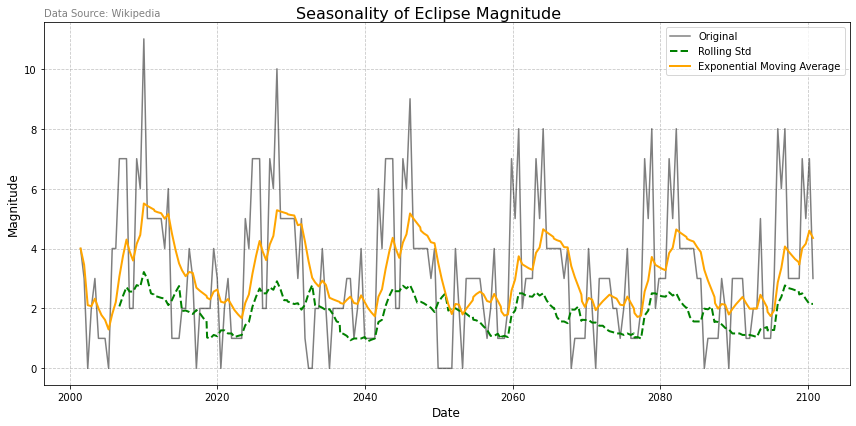

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling mean and rolling standard deviation
rolling_window = 12  # Adjust the rolling window size as needed
rolling_mean = df.set_index('Date')['Magnitude'].rolling(window=rolling_window).mean()
rolling_std = df.set_index('Date')['Magnitude'].rolling(window=rolling_window).std()

# Calculate exponential moving average (EMA)
ema = df.set_index('Date')['Magnitude'].ewm(span=rolling_window, min_periods=0, adjust=True).mean()

# Plot the original time series, rolling mean, rolling standard deviation, and EMA
plt.figure(figsize=(12, 6))

# Original time series
plt.plot(df.set_index('Date')['Magnitude'], label='Original', color='black', alpha=0.5)

# Rolling standard deviation
plt.plot(rolling_std, label='Rolling Std', color='green', linestyle='--', linewidth=2)

# Exponential moving average
plt.plot(ema, label='Exponential Moving Average', color='orange', linestyle='-', linewidth=2)

# Add subtitle
plt.suptitle('Seasonality of Eclipse Magnitude', fontsize=16)
plt.title('Data Source: Wikipedia', fontsize=10, color='gray', loc='left', y=1.0)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.legend(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

